In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/scrap price.csv')

In [15]:
df.head(2)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [40]:
dc = df[["wheelbase","enginesize","boreratio","stroke","price"]]

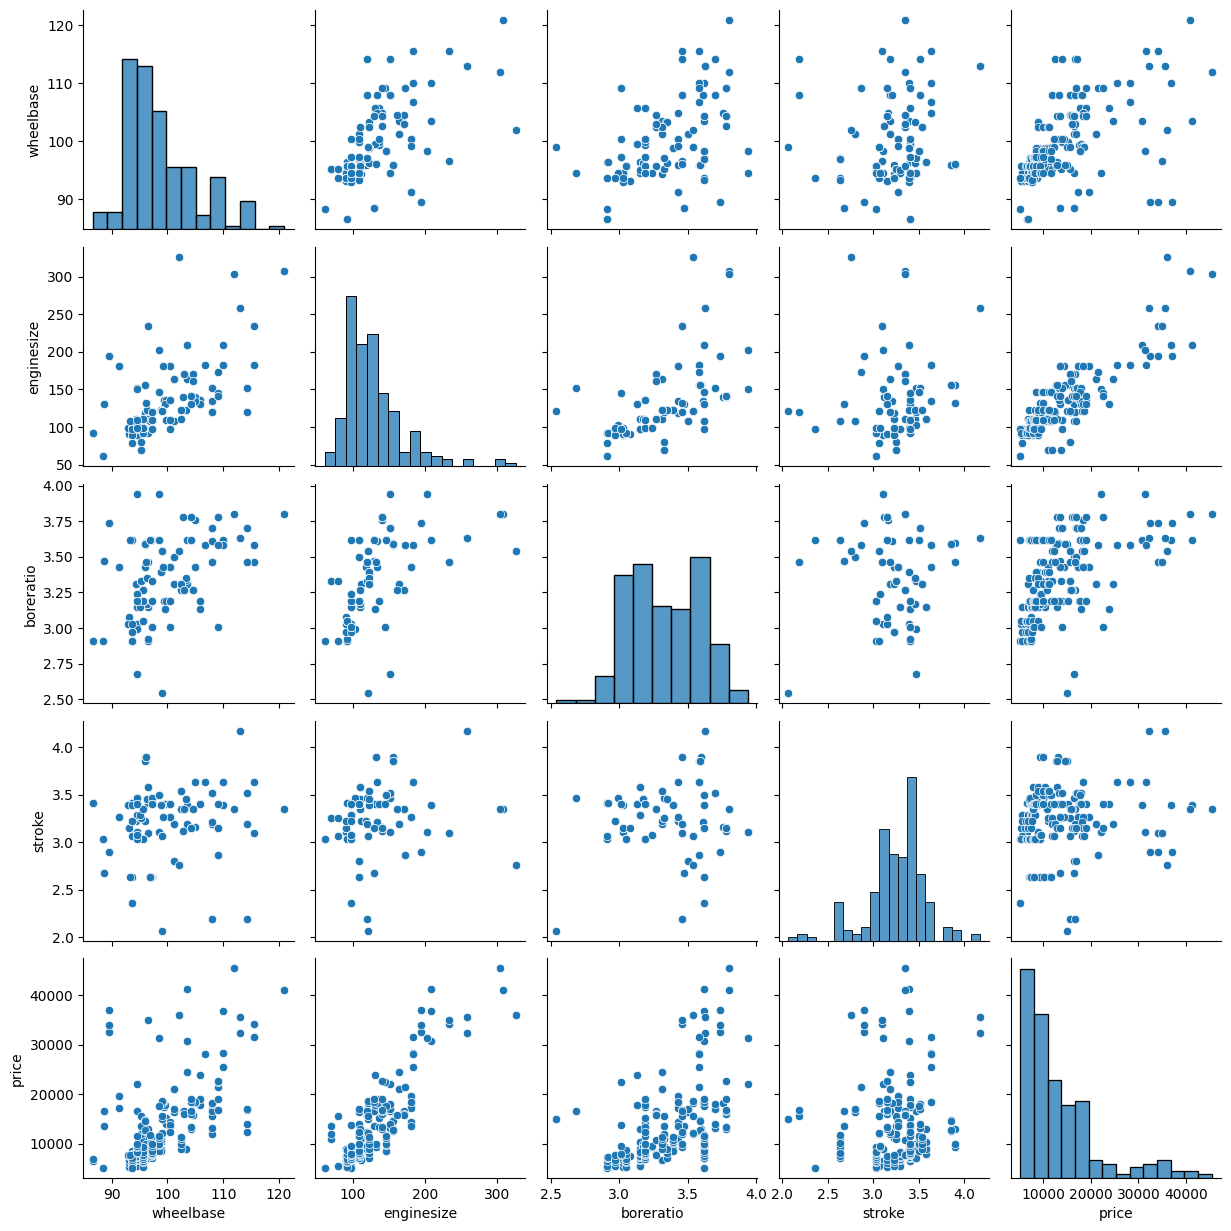

In [41]:
sns.pairplot(data=dc)

In [48]:
X = dc[["wheelbase","enginesize","boreratio","stroke"]] # Select all rows for the features
y = dc["price"]

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
from sklearn.linear_model import LinearRegression,SGDRegressor

In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6842225124586856

In [58]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
poly = PolynomialFeatures(degree=4,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [59]:
print(X_train.iloc[0]) # Use iloc to access the first row by position
print(X_train_trans[0])

wheelbase     115.60
enginesize    234.00
boreratio       3.46
stroke          3.10
Name: 71, dtype: float64
[1.00000000e+00 1.15600000e+02 2.34000000e+02 3.46000000e+00
 3.10000000e+00 1.33633600e+04 2.70504000e+04 3.99976000e+02
 3.58360000e+02 5.47560000e+04 8.09640000e+02 7.25400000e+02
 1.19716000e+01 1.07260000e+01 9.61000000e+00 1.54480442e+06
 3.12702624e+06 4.62372256e+04 4.14264160e+04 6.32979360e+06
 9.35943840e+04 8.38562400e+04 1.38391696e+03 1.23992560e+03
 1.11091600e+03 1.28129040e+07 1.89455760e+05 1.69743600e+05
 2.80135440e+03 2.50988400e+03 2.24874000e+03 4.14217360e+01
 3.71119600e+01 3.32506000e+01 2.97910000e+01 1.78579390e+08
 3.61484233e+08 5.34502328e+06 4.78889369e+06 7.31724140e+08
 1.08195108e+07 9.69378134e+06 1.59980801e+05 1.43335399e+05
 1.28421890e+05 1.48117170e+09 2.19010859e+07 1.96223602e+07
 3.23836569e+05 2.90142590e+05 2.59954344e+05 4.78835268e+03
 4.29014258e+03 3.84376936e+03 3.44383960e+03 2.99821954e+09
 4.43326478e+07 3.97200024e+07 6.5551

In [60]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

-12611.507933269613